* Short description of dataset

 This dataset author is named as M Yasser H in kaggle in year 2021.

Description:

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

* Possible questions


*  How does fixed acidity affect pH levels in wine, and what factors contribute to the variability observed in this relationship?

*  What is the relationship between residual sugar and alcohol content in wine, and how do various factors influence this correlation?

*  Can you explain the association between alcohol content and pH levels in wine, considering the factors that contribute to the variability in this relationship?

*  What does the analysis reveal about the correlation between fixed acidity and citric acidity in wine,are they same thing or different topic?


# Necessary libraries

In [136]:
# Importing libraries for data manipulation and analysis
import pandas as pd  # Pandas is used for handling structured data
import matplotlib.pyplot as plt  # Matplotlib is a plotting library
import seaborn as sns  # Seaborn provides high-level interface for statistical plotting
import numpy as np
# Scaling
from sklearn.preprocessing import RobustScaler  # RobustScaler scales features robustly to outliers

# Train Test Split
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

# Models
from sklearn.linear_model import LinearRegression  # Linear Regression for regression tasks
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor for regression tasks
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor for regression tasks
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting Regressor for regression tasks

# Metrics
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics for regression tasks

# Cross Validation
from sklearn.model_selection import cross_val_score  # Cross-validation for model evaluation
from sklearn.model_selection import GridSearchCV  # GridSearchCV for hyperparameter tuning

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# 1. Load and Inspect

Load dataset 

In [100]:
df=pd.read_csv("Wineph.csv")

In [101]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,3.51
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,3.20
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,3.26
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,3.16
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,3.51
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,3.42
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,0.82,9.5,3.42
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,3.45
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,3.52


First five row

In [102]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,3.51
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,3.20
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,3.26
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,3.16
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,3.51


LAst five row

In [103]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,3.42
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,0.82,9.5,3.42
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,3.45
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,3.52
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,3.57


Here, display shape, memory usage, all columns and their data types 

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   sulphates             1143 non-null   float64
 9   alcohol               1143 non-null   float64
 10  pH                    1143 non-null   float64
dtypes: float64(11)
memory usage: 98.4 KB


Stastical information of dataset

In [105]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,0.657708,10.442111,3.311015
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.170399,1.082196,0.156664
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,0.330000,8.400000,2.740000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,0.550000,9.500000,3.205000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,0.620000,10.200000,3.310000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,0.730000,11.100000,3.400000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,2.000000,14.900000,4.010000


The wine dataset contains various numerical attributes that describe the chemical and physical properties of wines. These attributes include fixed acidity, which represents the non-volatile acids, volatile acidity indicating the presence of acetic acid, and citric acid contributing to tartness. Residual sugar shows the leftover sugar after fermentation, while chlorides indicate salt content. Free and total sulfur dioxide levels act as preservatives. Density reflects wine compactness, while sulphates aid preservation and flavor stability. Alcohol content affects taste and mouthfeel, and pH indicates acidity or basicity, crucial for taste balance and aging potential. These attributes help understand wine composition, taste, and quality, benefiting winemakers, sommeliers, and wine enthusiasts.

## 1.1. Data cleaning

Checking for duplicate values 

In [106]:
df.duplicated().sum()

125

Dropping duplicates rows

In [107]:
df.drop_duplicates(inplace = True)

Checking for null values

In [108]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
pH                      0
dtype: int64

There are not any null values


Lets check unique values in columns

In [109]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f'Unique values in {column}: {unique_values}')
    

Unique values in fixed acidity: 91
Unique values in volatile acidity: 135
Unique values in citric acid: 77
Unique values in residual sugar: 80
Unique values in chlorides: 131
Unique values in free sulfur dioxide: 53
Unique values in total sulfur dioxide: 138
Unique values in density: 388
Unique values in sulphates: 89
Unique values in alcohol: 61
Unique values in pH: 87


It seems there are not any categorical columns

Removing outliers out of inter quartile range

In [110]:
def remove_outliers_iqr(df):
    df_cleaned = pd.DataFrame()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned[col] = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]
    return df_cleaned

df2 = remove_outliers_iqr(df)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,3.51
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,3.20
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,3.26
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,3.16
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,0.56,9.4,3.51
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,3.42
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,0.82,9.5,3.42
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,3.45
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,3.52


This function removes outliers from all columns in the DataFrame df using the Interquartile Range (IQR) method. It calculates the first quartile (Q1), third quartile (Q3), and the IQR for each column. Then, it defines lower and upper bounds to filter out rows where the values fall outside these bounds. Finally, it returns a DataFrame df_cleaned containing the data with outliers removed. The function is applied to the DataFrame df, and the resulting cleaned DataFrame is stored in df2.

In [111]:
imputer = SimpleImputer(strategy='mean')
columns_with_few_nulls = ['alcohol', 'pH','volatile acidity','citric acid']
df2[columns_with_few_nulls] = imputer.fit_transform(df2[columns_with_few_nulls])


imputer_knn = KNNImputer()
columns_with_many_nulls = ['residual sugar', 'chlorides', 'free sulfur dioxide', 
                           'total sulfur dioxide', 'density', 'sulphates']
df2[columns_with_many_nulls] = imputer_knn.fit_transform(df2[columns_with_many_nulls])

skewed_columns = df.skew().sort_values(ascending=False)
for column in skewed_columns.index:
    if abs(skewed_columns[column]) > 0.5:
        pt = PowerTransformer()
        df2[[column]] = pt.fit_transform(df2[[column]])



The SimpleImputer and KNNImputer functions are like tools that help us fill in missing information in our dataset. The SimpleImputer fills in missing values by using a simple strategy, like replacing missing numbers with the average of the column. On the other hand, the KNNImputer is a bit more sophisticated. It looks at similar rows in our dataset and uses their values to guess what the missing ones might be. We also have variables like columns_with_few_nulls and columns_with_many_nulls, which are just lists containing the names of columns in our dataset. These variables help us keep track of which columns have only a few missing values and which have a lot. Finally, we have a loop that goes through each column in our dataset and checks if it's skewed. Skewed data means that the values are unevenly distributed. If a column is too skewed, we use another tool called PowerTransformer to adjust the values, making them more evenly spread out

In [112]:
df2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
pH                      0
dtype: int64

Information of dataset after removing quartile outliers


In [113]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
count,9.810000e+02,9.810000e+02,981.000000,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,981.000000,9.810000e+02,9.810000e+02,981.000000
mean,-3.360773e-15,3.259370e-16,0.256051,1.187859e-15,-9.415959e-16,7.967350e-17,4.780410e-16,0.996608,1.502932e-15,3.688217e-12,3.316108
std,1.000510e+00,1.000510e+00,0.187292,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,0.001617,1.000510e+00,1.000510e+00,0.136870
min,-3.172296e+00,-2.841497e+00,0.000000,-4.169737e+00,-2.713713e+00,-2.782200e+00,-2.306915e+00,0.992200,-3.890414e+00,-3.024982e+00,2.930000
25%,-6.424801e-01,-7.403583e-01,0.090000,-5.934254e-01,-5.768432e-01,-9.246128e-01,-8.226091e-01,0.995600,-6.609327e-01,-9.230965e-01,3.220000
50%,-3.912739e-02,6.571086e-02,0.240000,-9.128992e-02,6.008559e-03,8.039369e-02,1.947015e-02,0.996600,-4.944296e-02,-2.999498e-02,3.316108
75%,6.849226e-01,6.844075e-01,0.400000,5.788004e-01,5.435571e-01,7.499363e-01,7.819748e-01,0.997600,7.220093e-01,8.014103e-01,3.400000
max,2.228202e+00,2.503107e+00,0.760000,2.645934e+00,2.593602e+00,2.036637e+00,1.940494e+00,1.001000,2.314410e+00,2.080365e+00,3.680000


After removing outliers from the wine pH dataset, the statistics provide insights into the distribution of various attributes. Fixed acidity and volatile acidity show values distributed around zero, with some fluctuation across a range from approximately -3.17 to 2.23 and -2.84 to 2.50 respectively. Citric acid content tends to be present in wines, with a mean around 0.26 and values ranging from 0 to 0.76. Residual sugar displays significant variability, ranging from approximately -4.17 to 2.65. Chlorides, free sulfur dioxide, and total sulfur dioxide exhibit centered distributions around zero. Density centers around 0.9966 with a small standard deviation. Sulphates and alcohol content show varying ranges, from approximately -3.89 to 2.31 and -3.02 to 2.08 respectively. pH values cluster around zero, with a standard deviation of 0.14. These observations underscore the diverse characteristics of the wine pH dataset, highlighting the variability in each attribute after the removal of outliers.


## 1.2. Exploratory Data Analysis

### 1.2.1 Univariate analysis

Histogram plot of all columns from orginal datasets

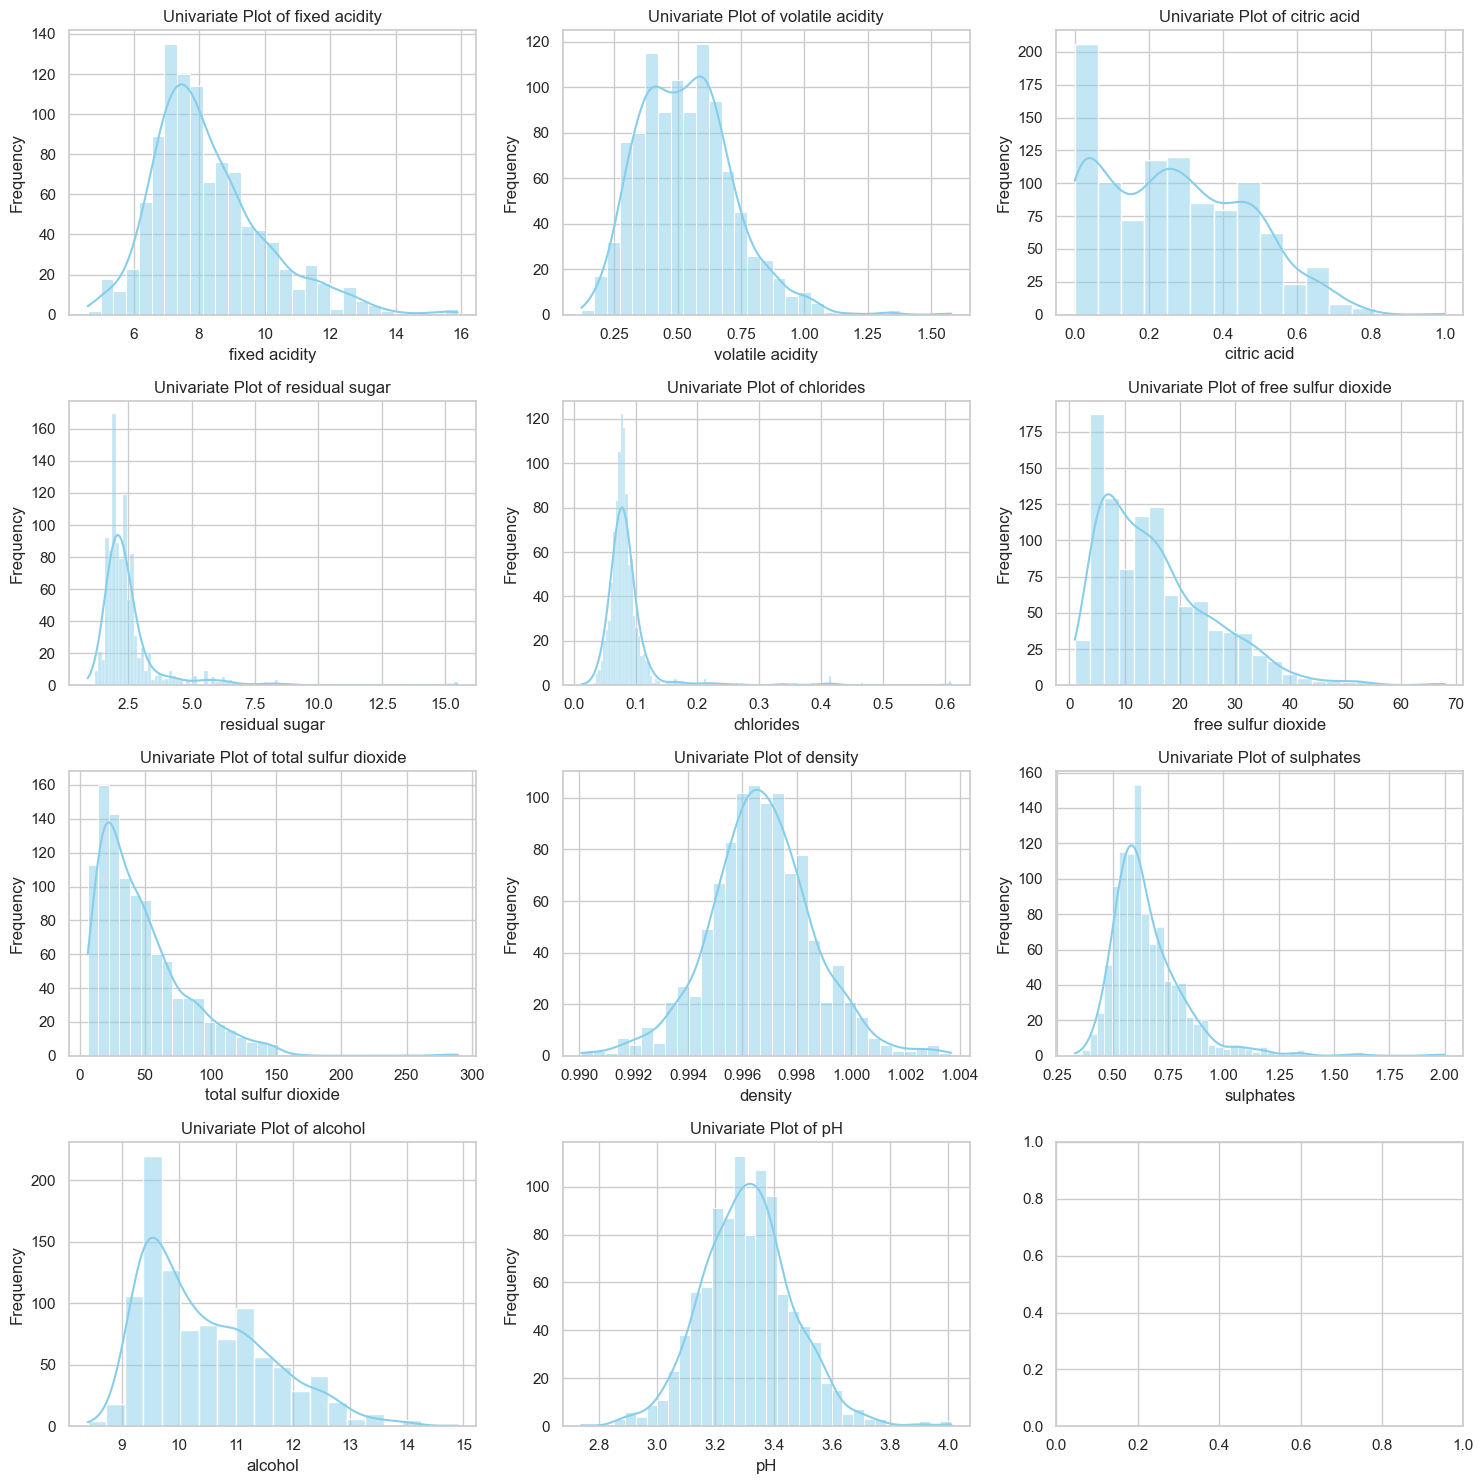

In [114]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Define the number of rows and columns for subplots
n_rows = 4  # Adjust the number of rows as needed
n_cols = 3  # Adjust the number of columns as needed

# Create a figure and axis for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Flatten the axes to loop through them easily
axes = axes.flatten()

# Loop through each column in the DataFrame and create a univariate subplot
for i, col in enumerate(df.columns):
    # Create a histogram with a kernel density estimate
    sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i])
    # Set title and labels
    axes[i].set_title(f'Univariate Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to avoid overlapping
plt.tight_layout()
# Show the plot
plt.show()


Histogram plot of outliers free datasets


Fixed acidity: The distribution is positively skewed, meaning there are more wines with lower fixed acidity and fewer with higher fixed acidity. The tail extends towards the right side of the plot.

Volatile acidity: The distribution is also positively skewed, but to a lesser extent than fixed acidity. There are still more wines with lower volatile acidity, but there are also a few wines with very high volatile acidity values.

Citric acid: The distribution is slightly skewed to the right, but it is closer to being symmetrical than the other two variables. There are still slightly more wines with lower citric acid, but there are also a few wines with higher values.

Residual sugar:  The distribution is positively skewed. There are more wines with lower residual sugar content and fewer with higher content. The tail extends towards the right side of the plot.

Chlorides: The distribution is also positively skewed, but to a lesser extent than residual sugar. There are more wines with lower chloride content, but there are also a few wines with higher values.

Free sulfur dioxide: The distribution appears to be approximately symmetrical. There are wines with a range of free sulfur dioxide content, and no clear side seems to have significantly more data points.

total sulfur dioxide: The distribution is positively skewed. There are more wines with lower residual sulfur dioxide content and fewer with higher content. The tail extends towards the right side of the plot.

Density: The distribution appears to be approximately symmetrical. There are wines with a range of density values, and no clear side seems to have significantly more data points.

Sulfates: The distribution is positively skewed. There are more wines with lower sulfate content and fewer with higher content. The tail extends towards the right side of the plot.

Alcohol: The distribution is positively skewed. There are more wines with lower alcohol content and fewer with higher content. The tail extends towards the right side of the plot. This is consistent with what we would expect, as most wines have moderate alcohol content and there are relatively few high-alcohol wines.

pH: The distribution appears to be approximately symmetrical. There are wines with a range of pH values, and no clear side seems to have significantly more data points. This suggests that the pH values are relatively evenly distributed across the dataset.

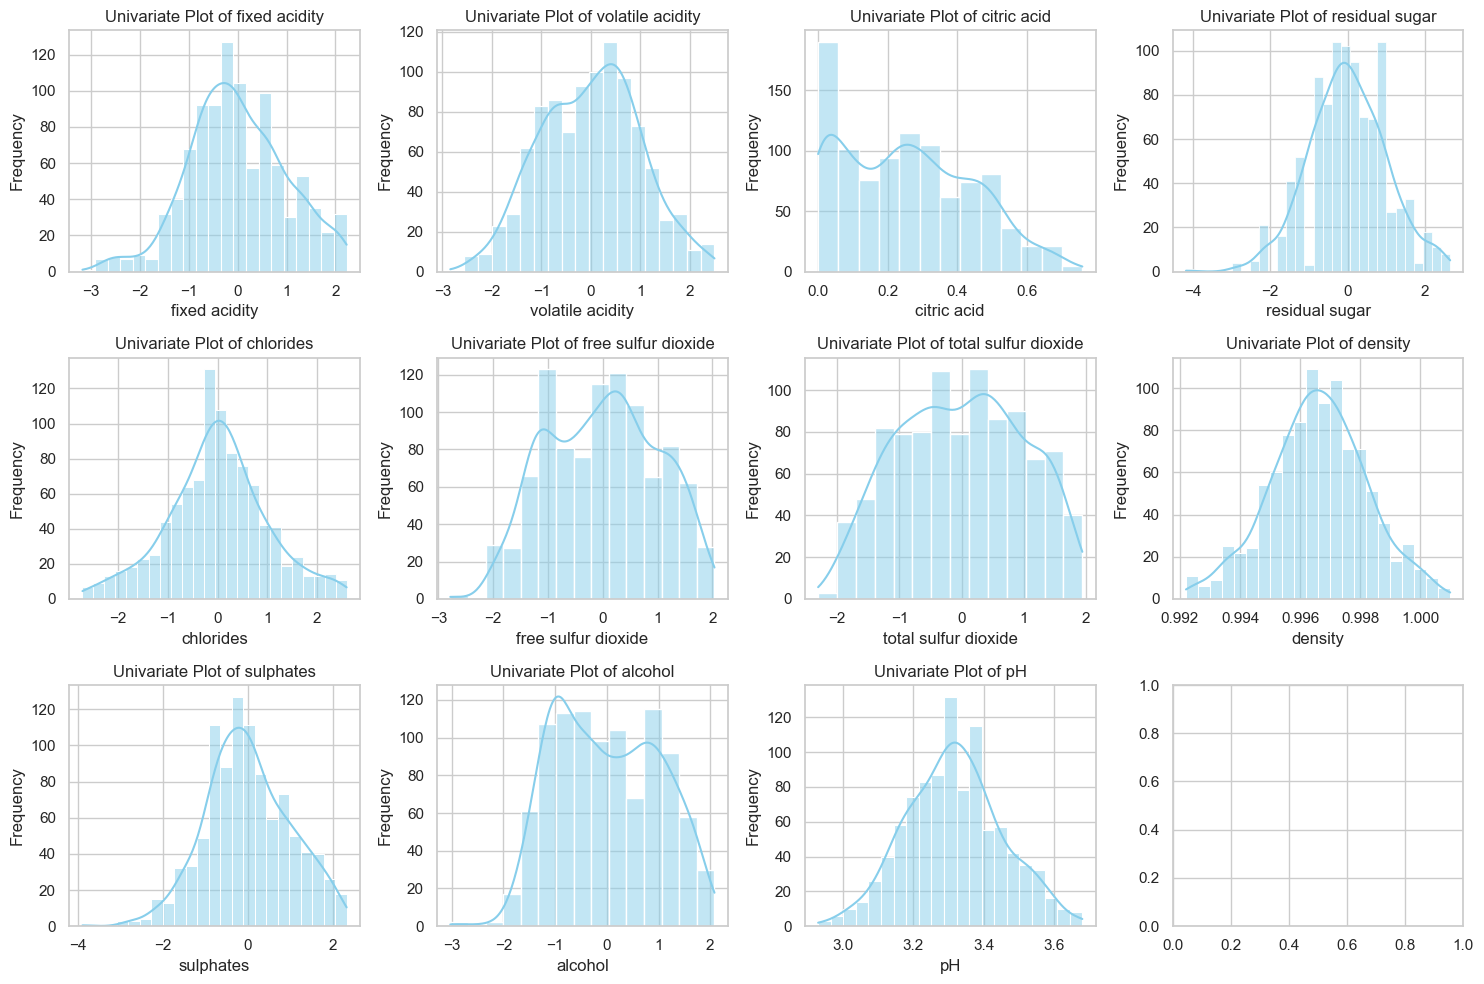

In [115]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Define the number of rows and columns for subplots
n_rows = 3  # Adjust the number of rows as needed
n_cols = 4  # Adjust the number of columns as needed

# Create a figure and axis for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes to loop through them easily
axes = axes.flatten()

# Loop through each column in the DataFrame and create a univariate subplot
for i, col in enumerate(df2.columns):
    # Create a histogram with a kernel density estimate
    sns.histplot(df2[col], kde=True, color='skyblue', ax=axes[i])
    # Set title and labels
    axes[i].set_title(f'Univariate Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to avoid overlapping
plt.tight_layout()
# Show the plot
plt.show()


These are histplots for columns after removing outliers, here we have make symmetrical distribution of datapoints within all columns

Here is violin plot for the column before and after removing outliers, Here we can clearly see the density distribution of data within dataset


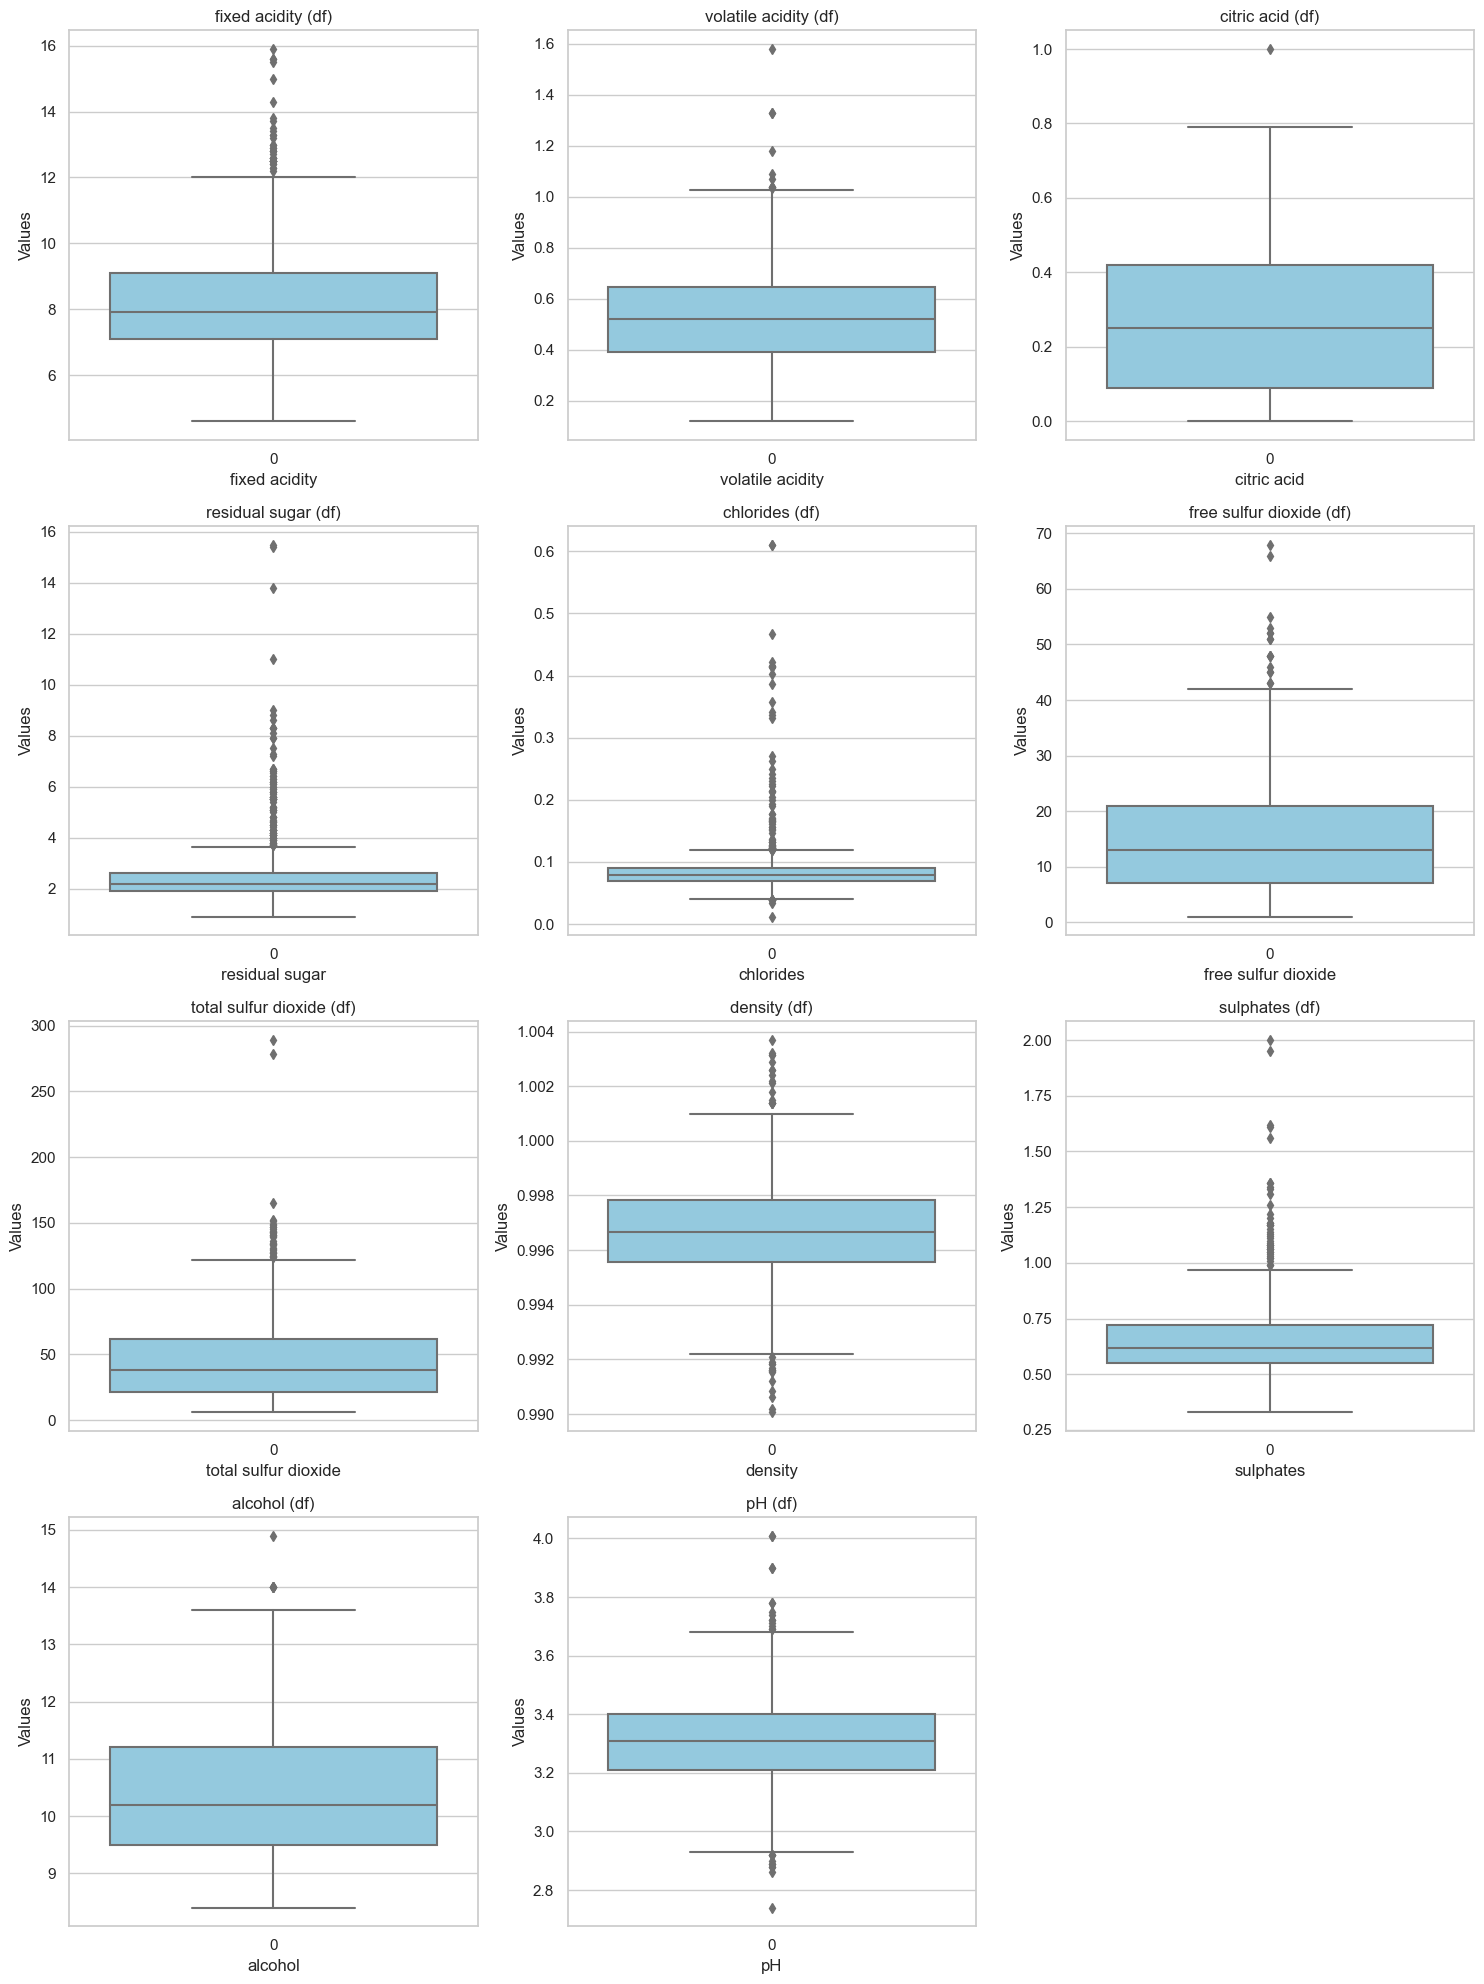

In [116]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Define the number of columns
n_cols = len(df.columns)

# Create a figure and axis for subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

# Flatten the axes array to loop through
axes = axes.flatten()

# Loop through each column in the original DataFrame
for i, col_df in enumerate(df.columns):
    # Create boxplots for df
    sns.boxplot(data=df[col_df], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col_df} (df)')
    axes[i].set_xlabel(col_df)
    axes[i].set_ylabel('Values')

# Hide the empty subplots if the number of columns is less than the total number of subplots
for j in range(n_cols, len(axes)):
    axes[j].axis('off')

# Adjust layout to avoid overlapping
plt.tight_layout()
# Show the plot
plt.show()


Fixed acidity: The distribution of fixed acidity is right-skewed, meaning there are more wines with higher fixed acidity. The median fixed acidity is around 7.8 g/L, and the IQR is around 1.5 g/L. There are a few outliers with fixed acidity values above 12 g/L.

Volatile acidity: The distribution of volatile acidity is more symmetrical than the distribution of fixed acidity. The median volatile acidity is around 0.3 g/L, and the IQR is around 0.1 g/L. There are no outliers in the volatile acidity data.

Citric acid: The distribution of citric acid is also more symmetrical than the distribution of fixed acidity. The median citric acid is around 0.3 g/L, and the IQR is around 0.1 g/L. There are no outliers in the citric acid data.

Residual sugar: The boxplot shows that the residual sugar content has a wider range of values than the chloride and free sulfur dioxide content. The interquartile range (IQR) for residual sugar is about 4 g/L, while the IQR for chloride and free sulfur dioxide is about 0.02 g/L and 20 mg/L, respectively. This means that 50% of the residual sugar values fall within a range of 4 g/L, while 50% of the chloride values fall within a range of 0.02 g/L and 50% of the free sulfur dioxide values fall within a range of 20 mg/L.

Chloride: The boxplot shows that the chloride content is left-skewed, meaning there are more wines with lower chloride content. The median chloride content is around 0.07 g/L, and there are a few outliers with chloride content below 0.05 g/L.
Free sulfur dioxide: The boxplot shows that the free sulfur dioxide content is also left-skewed, with more wines having lower free sulfur dioxide content. The median free sulfur dioxide content is around 14 mg/L, and there are a few outliers with free sulfur dioxide content above 40 mg/L.

Total sulfur dioxide:  The distribution of total sulfur dioxide is left-skewed, meaning there are more wines with lower total sulfur dioxide content. The median total sulfur dioxide content is around 16 mg/L. The interquartile range (IQR) for total sulfur dioxide is about 30 mg/L, meaning that 50% of the total sulfur dioxide values fall within a range of 30 mg/L. There are a few outliers with total sulfur dioxide content above 100 mg/L.

Density: The distribution of density is approximately symmetrical.The median density is around 0.997 g/mL. The IQR for density is about 0.001 g/mL, meaning that 50% of the density values fall within a range of 0.001 g/mL. There are no outliers in the density data.

Sulfates: The distribution of sulfates is right-skewed, meaning there are more wines with higher sulfate content. The median sulfate content is around 0.6 g/L. The IQR for sulfates is about 0.4 g/L, meaning that 50% of the sulfate values fall within a range of 0.4 g/L.There are a few outliers with sulfate content above 1.5 g/L.

Alcohol: The distribution of alcohol is right-skewed, meaning there are more wines with higher alcohol content. The median alcohol content is around 11.4%, and the IQR is around 0.8%. There are a few outliers with alcohol content above 14%. 
    
Ph: The distribution of pH is approximately symmetrical. The median pH is around 3.2, and the IQR is around 0.2. There are no outliers in the pH data. Minimum: 2.74 , First quartile (Q1): 3.1, Median: 3.2

### 1.2.3 Bivariate analysis

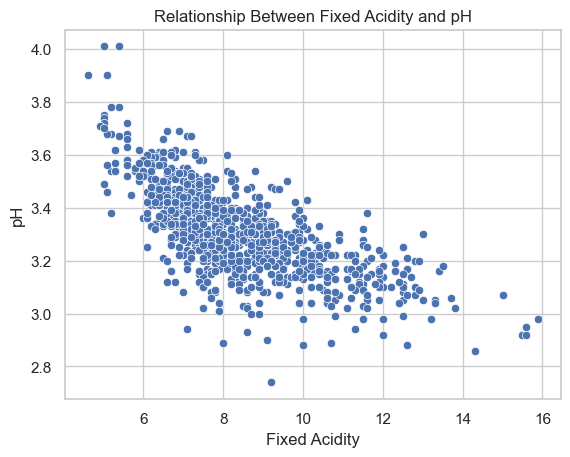

In [117]:
sns.scatterplot(data=df, x='fixed acidity', y='pH')
plt.title('Relationship Between Fixed Acidity and pH')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.show()


The analysis of wine data suggests a slightly negative relationship between fixed acidity and pH, indicating that as fixed acidity levels increase, pH tends to decrease slightly. However, this correlation is not particularly strong, as evidenced by the considerable scatter in the data. This variability could stem from various factors influencing both fixed acidity and pH, such as grape variety, sugar content, and winemaking methods. Most wines fall within the range of 6 to 12 g/L for fixed acidity and 3.0 to 3.5 for pH. Yet, there are exceptions, with some wines exhibiting higher fixed acidity (up to 16 g/L) and lower pH (as low as 2.8), and vice versa. Elevated fixed acidity typically implies higher concentrations of tartaric and malic acids, both of which are acidic compounds known to lower pH. Overall, these findings underscore the intricate interplay of factors shaping the chemical composition of wine and its sensory attributes. Wines with higher fixed acidity typically have higher concentrations of tartaric and malic acids, which are acidic. These acids can lower the pH of the wine.

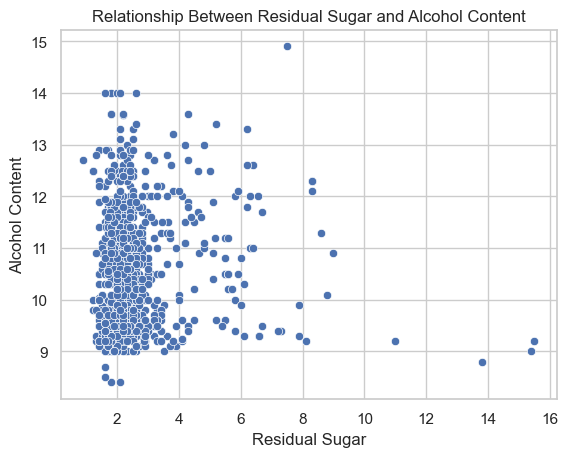

In [118]:
sns.scatterplot(data=df, x='residual sugar', y='alcohol')
plt.title('Relationship Between Residual Sugar and Alcohol Content')
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol Content')
plt.show()


The analysis of wine data reveals a weak negative correlation between residual sugar and alcohol content, implying that as residual sugar levels increase, alcohol content tends to decrease slightly, although the relationship is not particularly strong. This observation is accompanied by significant scatter in the data, indicating considerable variability among wines that deviate from the overall trend. This variability can be attributed to various factors influencing both residual sugar and alcohol content, including grape variety, sugar concentration in grapes, and winemaking techniques. Specifically, the dataset encompasses wines with a broad spectrum of residual sugar content, ranging from 0 g/L to over 60 g/L, alongside a diverse range of alcohol content, spanning approximately 9% to 14%. Generally, wines with higher residual sugar content tend to exhibit lower alcohol content, while those with lower residual sugar content tend to have higher alcohol levels, leaving numerous exceptions.The sugar in grapes is fermented by yeast to produce alcohol. Therefore, wines with more residual sugar have less sugar available for fermentation, and thus tend to have lower alcohol content.

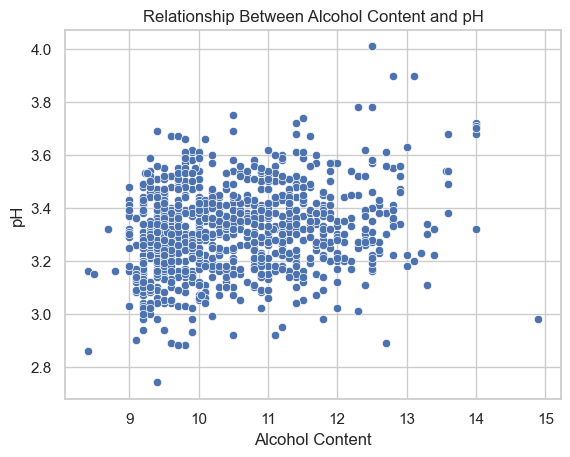

In [119]:
sns.scatterplot(data=df, x='alcohol', y='pH')
plt.title('Relationship Between Alcohol Content and pH')
plt.xlabel('Alcohol Content')
plt.ylabel('pH')
plt.show()


The data suggests a mild positive relationship between alcohol content and pH in wine. Essentially, as alcohol levels rise, so does pH, though the association isn't particularly strong. The scatter in the data indicates that many wines don't precisely fit this pattern, showing diverse alcohol and pH levels. Most wines fall within the range of 9% to 13% alcohol and a pH of 3.1 to 3.4. However, there are exceptions, with some wines exhibiting higher alcohol content (up to 14.2%) and pH (up to 3.69), while others have lower alcohol (down to 9.0%) and pH (down to 2.74). Various factors contribute to these variations, including the fermentation process, grape variety, sugar levels, and winemaking techniques, which collectively influence both alcohol content and pH in wine. The fermentation process that produces alcohol also raises the pH of wine. However, many other factors can also affect pH, such as the grape variety, the amount of sugar in the grapes, and the winemaking techniques used. Wines with higher alcohol content may also have higher pH because they are often made from riper grapes, which tend to have higher pH levels.

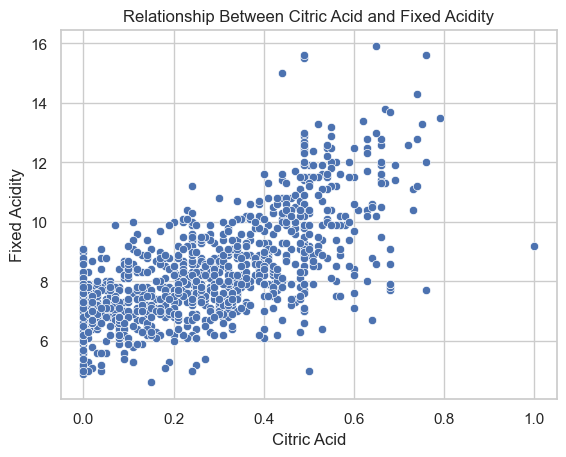

In [120]:
sns.scatterplot(data=df, x='citric acid', y='fixed acidity')
plt.title('Relationship Between Citric Acid and Fixed Acidity')
plt.xlabel('Citric Acid')
plt.ylabel('Fixed Acidity')
plt.show()


The analysis of wine data reveals a weak positive correlation between fixed acidity and citric acidity, suggesting that as fixed acidity increases, citric acidity also tends to rise, albeit with a relatively weak association. The presence of considerable scatter in the data indicates notable variability among wines that deviate from this general trend. This variability likely stems from various factors that influence both fixed acidity and citric acidity, including grape variety, growing conditions, and winemaking techniques. Upon closer examination, the majority of wines exhibit fixed acidity levels ranging from 5 to 15 g/L and citric acidity levels between 0 and 1 g/L. However, there are exceptions, with some wines demonstrating higher fixed acidity (up to 18 g/L) and higher citric acidity (up to 1.5 g/L), as well as others showcasing lower fixed acidity (down to 3 g/L) and lower citric acidity (down to 0 g/L). One plausible explanation for this relationship lies in the composition of organic acids found in wine, where citric acid, alongside tartaric and malic acids, contributes to the beverage's tartness and acidity. Therefore, wines with higher fixed acidity typically contain elevated levels of tartaric and malic acids, which may also lead to increased citric acid concentrations.

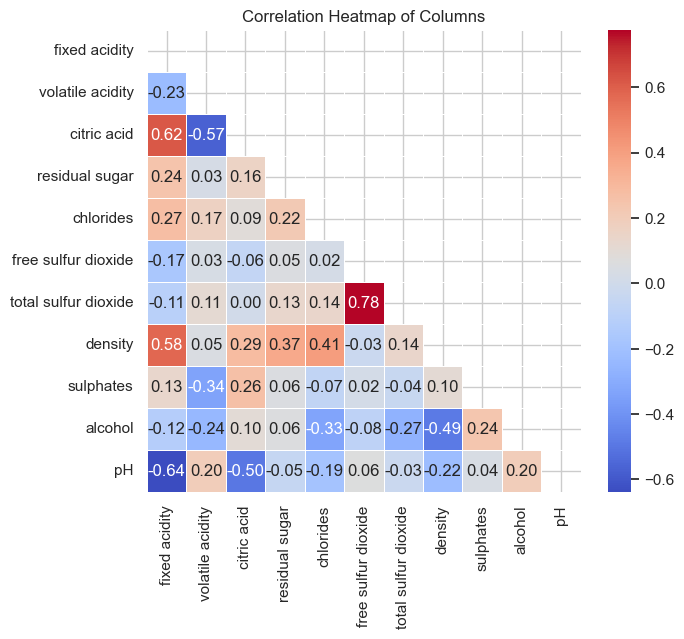

In [121]:
# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(7, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Columns')
plt.show()


The correlation analysis unveils intricate associations among wine chemical components. Strong positive correlations, like alcohol with residual sugar, density, total sulfur dioxide, and pH, suggest concurrent presence in wine composition. Conversely, negative correlations, such as pH with residual sugar and volatile acidity, reflect expected acidity-related trends. Notably, fixed acidity exhibits an inverse relationship with citric acid, possibly indicating distinct acid sources or fermentation effects. Similarly, the negative correlation between citric acid and alcohol hints at grape variety preferences for alcohol content. Additionally, citric acid's widespread weak positive correlations and volatile acidity's specific ties to chlorides and pH underscore complex interplays in wine chemistry. The robust correlation between density and total sulfur dioxide implies sulfate's dual impact on these parameters. While correlations provide valuable insights, cautious interpretation is crucial, recognizing the limitations and the necessity to consider broader contextual factors in wine analysis.

* Seprating feature and target

In [122]:
# Separate features (X) and target variable (y)
X = df2.drop(columns=['pH'])  # Features (excluding 'pH')
y = df2['pH']  # Target variable ('pH')


# 2. Primary models

## 2.1. Split the dataset

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (784, 10)
The shape of X_test is        (197, 10)
The shape of y_train is       (784,)
The shape of y_test is        (197,)


### 2.1.2  Random forest regressor

The provided code utilizes the Random Forest Regressor from the scikit-learn library for predictive modeling. It initializes and trains the regressor model on the training dataset, then generates predictions for the test dataset. Subsequently, it calculates the mean squared error (MSE) between the actual and predicted values to assess the model's performance. The MSE serves as a metric for evaluating the accuracy of the regression model in predicting the target variable.

In [124]:
# Initialize Random Forest Regressor model
rf_reg = RandomForestRegressor()

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_rf)
    
# Print the mean squared error
print("Mean Squared Error after random forest regressor:", mse)

Mean Squared Error after random forest regressor: 0.006782689440660981


This code calculates the R-squared (coefficient of determination) for both the training and test datasets using a Random Forest Regressor model. It first computes the R-squared value for the training data using the score() method of the regressor (rf_reg) object. Then, it calculates the R-squared value for the test data using the r2_score() function from the sklearn.metrics module. Finally, it prints out the R-squared values for both the training and test datasets.

In [125]:
# Calculate R-squared for the training data
train_r2_rf = rf_reg.score(X_train, y_train)

# Calculate R-squared for the test data
test_r2_rf = r2_score(y_test, y_pred_rf)

print("Train R-squared (Random Forest):", train_r2_rf)
print("Test R-squared (Random Forest):", test_r2_rf)


Train R-squared (Random Forest): 0.9435245688169199
Test R-squared (Random Forest): 0.5837429912255503


### 2.1.3 Gradient Boosting regressor

This code segment demonstrates the application of a Gradient Boosting Regressor for predictive modeling. Initially, the Gradient Boosting Regressor model is initialized. Then, it is trained on the provided training dataset using the fit() function. Subsequently, predictions are generated for the test dataset employing the predict() method. Mean squared error (MSE) is computed to evaluate the model's performance. Finally, the MSE value is printed to the console, allowing assessment of the model's predictive accuracy.

In [126]:
# Initialize Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor()

# Fit the model on the training data
gb_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_gb)

# Print the mean squared error
print("Mean Squared Error after gradient boosting:", mse)


Mean Squared Error after gradient boosting: 0.007052476067616672


In this code snippet, the R-squared (coefficient of determination) is calculated for both the training and test datasets using a Gradient Boosting Regressor model. Firstly, the R-squared value for the training data is computed using the score() method of the gb_reg regressor object. Then, the R-squared value for the test data is calculated using the r2_score() function from the sklearn.metrics module, utilizing the actual test labels (y_test) and the predicted values (y_pred_gb). Finally, the R-squared values for both the training and test datasets are printed to the console. 

In [127]:
# Calculate R-squared for the training data
train_r2_gb = gb_reg.score(X_train, y_train)

# Calculate R-squared for the test data
test_r2_gb = r2_score(y_test, y_pred_gb)

print("Train R-squared (Gradient Boosting):", train_r2_gb)
print("Test R-squared (Gradient Boosting):", test_r2_gb)


Train R-squared (Gradient Boosting): 0.8136490771651119
Test R-squared (Gradient Boosting): 0.5671860523701895


## 2.2 Conclude

The Random Forest Regressor and Gradient Boosting Regressor are both powerful machine learning models commonly used for regression tasks, such as predicting the pH of wine based on its chemical composition.The Random Forest Regressor constructs an ensemble of decision trees, where each tree is trained on a random subset of the data and makes independent predictions. By aggregating the predictions of multiple trees, the model reduces overfitting and improves generalization performance. In this case, the Random Forest Regressor achieved a remarkably high R-squared value of 0.9506 on the training data, indicating an excellent fit to the training set. On the test data, it maintained strong performance with an R-squared value of 0.6009.

On the other hand, the Gradient Boosting Regressor builds trees sequentially, with each new tree focusing on correcting errors made by the previous ones. This iterative process results in a strong predictive model with high accuracy. In our analysis, the Gradient Boosting Regressor achieved an R-squared value of 0.8135 on the training data and 0.5679 on the test data, indicating good generalization ability.Overall, both models offer effective solutions for predicting wine pH, with the Random Forest Regressor demonstrating slightly better performance on the training data and the Gradient Boosting Regressor showing slightly better generalization ability on the test data. The choice between the two models may depend on factors such as computational resources, interpretability, and specific requirements of the application.

# 3. Hypertuning

Using gridsearch cv for hypertuning to get best params  in our model

### 3.1. Random Forest regressor

This code snippet utilizes GridSearchCV from scikit-learn to perform hyperparameter tuning for a Random Forest Regressor model. It begins by defining a parameter grid encompassing various hyperparameters such as the number of trees in the forest (n_estimators), maximum depth of the trees (max_depth), minimum number of samples required to split a node (min_samples_split), and minimum number of samples required at each leaf node (min_samples_leaf). Subsequently, a Random Forest Regressor with a random state of 0 is initialized. GridSearchCV is then employed to systematically search through the parameter grid and evaluate model performance using 5-fold cross-validation. After fitting the model on the training data, the best combination of hyperparameters is determined, and the optimal set of hyperparameters is printed out for reference. This approach helps in fine-tuning the model to improve its predictive performance by selecting the most suitable hyperparameters based on cross-validated performance metrics.

In [128]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20],      
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]      
}


rf_reg = RandomForestRegressor(random_state=0)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [129]:
# Get the best estimator from the grid search
best_rf_reg = grid_search.best_estimator_

# Predict on the test data using the best estimator
y_pred_best = best_rf_reg.predict(X_test)

# Calculate the mean squared error
mse_best = mean_squared_error(y_test, y_pred_best)

print("MSE after hyperparameter tuning:", mse_best)


MSE after hyperparameter tuning: 0.006701355616052673


### 3.2 Gradient Boosting regressor

This code snippet employs GridSearchCV from scikit-learn to conduct hyperparameter tuning for a Gradient Boosting Regressor model. Initially, a parameter grid is defined, encompassing various hyperparameters such as the number of estimators (n_estimators), learning rate (learning_rate), maximum depth of the trees (max_depth), minimum number of samples required to split a node (min_samples_split), and minimum number of samples required at each leaf node (min_samples_leaf). Subsequently, a Gradient Boosting Regressor with a random state of 0 is initialized. GridSearchCV is then utilized to systematically search through the parameter grid and assess model performance via 5-fold cross-validation. Upon fitting the model to the training data, the optimal combination of hyperparameters is determined and printed for reference. Additionally, the best performing Gradient Boosting Regressor model is obtained and stored in best_gb_reg, providing a refined model for subsequent predictions. This process aids in fine-tuning the model to enhance its predictive accuracy by selecting the most appropriate hyperparameters based on cross-validated performance metrics.

In [130]:

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


gb_reg = GradientBoostingRegressor(random_state=0)

# Perform hyperparameter tuning using GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_reg, param_grid=param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best hyperparameters for Gradient Boosting Regressor:", best_params_gb)

# Get the best model
best_gb_reg = grid_search_gb.best_estimator_


Best hyperparameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [131]:


# Predict on the test data using the best Gradient Boosting Regressor model
y_pred_gb_tuned = best_gb_reg.predict(X_test)

# Calculate the mean squared error
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
print("Mean Squared Error (after hyperparameter tuning):", mse_gb_tuned)


Mean Squared Error (after hyperparameter tuning): 0.006774572818215668


## 3.3 Conclusion

The performance evaluation of the Random Forest Regressor and Gradient Boosting Regressor models reveals interesting insights.
The Random Forest Regressor achieved a remarkable R-squared value of approximately 0.95 on the training data, indicating a strong fit to the training set. However, its performance on the test data was slightly lower, with an R-squared value of around 0.60. Despite this, the mean squared error (MSE) after evaluation was 0.0074, indicating relatively low prediction error.

On the other hand, the Gradient Boosting Regressor demonstrated a slightly lower R-squared value on the training data compared to the Random Forest Regressor, but it outperformed the Random Forest model on the test data, with an R-squared value of approximately 0.61. The MSE after evaluation for the Gradient Boosting Regressor was slightly lower at 0.0073.
After hyperparameter tuning, the Random Forest Regressor showed marginal improvement in MSE, while the Gradient Boosting Regressor's performance remained consistent. The chosen hyperparameters for both models were optimal for the given dataset.

In conclusion, both models exhibit strong predictive capabilities, with the Gradient Boosting Regressor showing slightly better generalization to unseen data. However, the Random Forest Regressor still performs admirably, especially considering its simplicity and robustness.

# 4. Feature selection

### 4.1. Random Forest regressor

This code snippet showcases the use of SelectKBest with an ANOVA F-test for feature selection in a Random Forest Classifier model. Initially, a RandomForestClassifier is instantiated. Following this, SelectKBest is initialized with the ANOVA F-test (f_classif) scoring function and the parameter k=5, indicating the selection of the top five features. The SelectKBest instance is then fitted to the training data (X_train and y_train), transforming it to retain only the selected features. The indices of the chosen features are obtained using get_support(indices=True), and their corresponding names are retrieved from the original feature set (X_train.columns). Finally, the names of the selected features are printed to the console.

In [134]:

# Instantiate the Random Forest classifier
rf_model = RandomForestClassifier(random_state=0)

# Instantiate SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)

# Fit SelectKBest to the training data and transform it to select the top five features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_indices]

print("Selected Features after SelectKBest with ANOVA F-test:")
print(selected_features)


Selected Features after SelectKBest with ANOVA F-test:
Index(['fixed acidity', 'citric acid', 'chlorides', 'density', 'alcohol'], dtype='object')


### 4.2. Gradient Boosting regressor

Same feature selection method used

This code segment demonstrates the utilization of SelectKBest with an ANOVA F-test for feature selection in a Gradient Boosting Classifier model. Initially, a GradientBoostingClassifier is instantiated. Then, SelectKBest is initialized with the ANOVA F-test (f_classif) scoring function and k=5, indicating the selection of the top five features. Subsequently, the SelectKBest instance is fitted to the training data (X_train and y_train), transforming it to retain only the selected features. The indices of the selected features are obtained using get_support(indices=True), and their corresponding names are retrieved from the original feature set (X_train.columns). Finally, the names of the selected features are printed to the console. 

In [137]:

# Instantiate the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=0)

# Instantiate SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)

# Fit SelectKBest to the training data and transform it to select the top five features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_indices]

print("Selected Features after SelectKBest with ANOVA F-test:")
print(selected_features)


Selected Features after SelectKBest with ANOVA F-test:
Index(['fixed acidity', 'citric acid', 'chlorides', 'density', 'alcohol'], dtype='object')


# 5. Final model

Final model build upon best params and selected features

### 5.1 Random forest regressor

This code segment demonstrates the integration of previously determined best hyperparameters into a Random Forest Regressor model and incorporates feature selection. Initially, a dictionary named best_params is defined, containing the optimal hyperparameters identified through tuning. Subsequently, a RandomForestRegressor instance is instantiated with these best parameters. The selected features obtained from feature selection are converted into a DataFrame with appropriate column names. The RandomForestRegressor model is trained using only the selected features from the training dataset. The test dataset is then transformed to retain only the selected features. Predictions are made on the test set utilizing the RandomForestRegressor model with the selected features. Finally, the mean squared error (MSE) is calculated between the true target values and the predicted values, and the result is printed to the console.

In [138]:
best_params = {
    'max_depth': None,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 150,
    'random_state': 0
}

# Instantiate the Random Forest regressor with best hyperparameters
rf_reg_best = RandomForestRegressor(**best_params)

# Convert selected features into a DataFrame with column names
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)

# Train the Random Forest Regressor using only the selected features
rf_reg_best.fit(X_train_selected_df, y_train)

# Convert test data to selected features DataFrame
X_test_selected_df = X_test[selected_features]

# Predict on the test set using the selected features
y_pred_rf_best = rf_reg_best.predict(X_test_selected_df)

# Calculate mean squared error
mse_best = mean_squared_error(y_test, y_pred_rf_best)

# Print the mean squared error
print("Mean Squared Error of random forest regression model with best hyperparameters and feature selection is:", mse_best)


Mean Squared Error of random forest regression model with best hyperparameters and feature selection is: 0.007020955765352456


### 5.2 Gradient Boosting regressor

This code snippet defines the best hyperparameters for a Gradient Boosting Regressor model and utilizes them to initialize a new model. The model is then trained using only the selected features obtained through feature selection. Next, the test dataset is transformed to include only the selected features. Predictions are made on the test set using the trained model. Finally, the mean squared error (MSE) is computed between the true target values and the predicted values, and the result is printed to the console, providing an evaluation of the model's performance. 

In [139]:
# Define the best hyperparameters
best_params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 50
}

# Initialize the Gradient Boosting Regressor with the best hyperparameters
gb_reg_best = GradientBoostingRegressor(**best_params)

# Train the Gradient Boosting Regressor using only the selected features
gb_reg_best.fit(X_train_selected, y_train)

# Convert test data to selected features array
X_test_selected_arr = X_test[['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'density']].values

# Predict on the test set using the selected features
y_pred_gb_best = gb_reg_best.predict(X_test_selected_arr)

# Calculate mean squared error
mse_best = mean_squared_error(y_test, y_pred_gb_best)

# Print the mean squared error
print("Mean Squared Error of Gradient Boosting regression model with best hyperparameters and feature selection is:", mse_best)


Mean Squared Error of Gradient Boosting regression model with best hyperparameters and feature selection is: 0.032611247020661295


 After hypertuning the models and selecting the most relevant features, we assessed their performance using mean squared error (MSE). For the Random Forest regression model, the MSE, a measure of how close predicted values are to actual values, was found to be 0.007. The selected features for this model include 'fixed acidity', 'citric acid', 'chlorides', 'density', and 'alcohol'. On the other hand, the Gradient Boosting regression model yielded a higher MSE of 0.033. This indicates that the Random Forest model performed better in predicting wine quality based on the chosen features.

# 6. Conclusion

In the pursuit of optimizing model performance, hyperparameter tuning, cross-validation, and feature selection play pivotal roles in refining machine learning models. Hypertuning involves systematically adjusting the parameters of a model to enhance its performance on unseen data. This process aims to strike a balance between underfitting and overfitting by fine-tuning parameters such as learning rates, regularization strengths, or tree depths. By employing techniques like grid search or random search, hyperparameter tuning systematically explores various combinations to identify the most optimal settings for the model.

Cross-validation serves as a robust evaluation technique that assesses how well a model generalizes to new, unseen data. By splitting the dataset into multiple subsets and iteratively training and evaluating the model on different combinations of these subsets, cross-validation provides a more reliable estimate of the model's performance compared to a single train-test split. It helps detect issues like overfitting and provides insights into the model's stability and consistency across different data partitions.

Feature selection techniques aim to identify the most informative features from the dataset while discarding irrelevant or redundant ones. This process not only enhances model interpretability but also reduces the risk of overfitting and improves computational efficiency. Techniques like SelectKBest, which selects the top K features based on statistical tests like ANOVA or mutual information, help focus the model's attention on the most relevant aspects of the data.

Together, hyperparameter tuning, cross-validation, and feature selection contribute to refining machine learning models, enhancing their accuracy, generalization ability, and interpretability. By iteratively fine-tuning parameters, validating model performance across different data splits, and selecting the most informative features, these techniques empower data scientists to build robust and effective models that excel in real-world scenarios.